   # Regression - Introduction


#### Module Check

- matplotlib
- sklearn
- statmodels
- numpy
- pandas

**If not installed**
- Create a new environment with Python 3.7.*
- conda install -c anaconda statsmodels
- pip install sklearn
- pip install matplotlib

In [5]:
#pip install numpy

In [6]:
#pip install statsmodels

In [7]:
#pip install sklearn

In [8]:
#pip install matplotlib

In [9]:
# Import libraries

import numpy as np # creating and manipulating arrays
import matplotlib.pyplot as plt # visualizing data
import sklearn # regression models
import statsmodels.api as sm 

#### Topic 1:

Generate and visualize data

In [10]:
# Generate inputs and outputs

np.random.seed(0) 

data = 2 * np.random.rand(100, 1)
#print(data)
output = 4 + 3 * data + np.random.randn(100, 1)
#print(output)

data_new = np.array([[0], [2]]) 
#print(data_new)

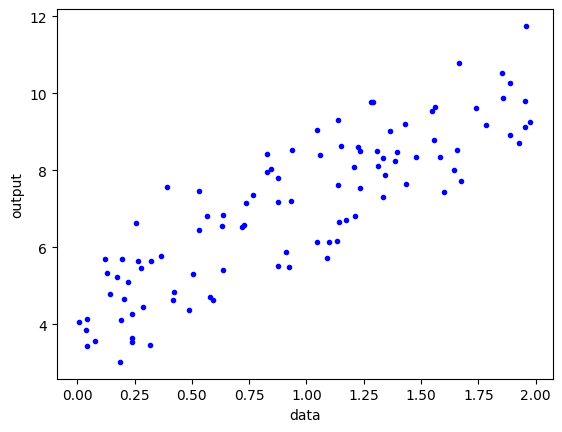

In [11]:
# Visualize the data 

plt.plot(data, output, "b.")
plt.xlabel("data", fontsize=10)
plt.ylabel("output", fontsize=10)
plt.show()

#### Topic 2:

Linear Regression using Statmodels - provides p-values

In [12]:
data_ols = sm.add_constant(data) # Add constant for the first value (intercept)
model = sm.OLS(endog= output, exog = data_ols)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     289.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           5.29e-31
Time:                        10:35:52   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2222      0.193     21.843      0.0

In [13]:
data_new_ols = sm.add_constant(data_new)
ols_output = results.get_prediction(data_new_ols).summary_frame(alpha=0.05)  

ols_output_list = ols_output['mean'].tolist()
ols_output_list

[4.222151077447228, 10.159086098849265]

#### Topic 3:

Linear Regression using Scikit learn

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data, output)
lin_reg.intercept_, lin_reg.coef_

(array([4.22215108]), array([[2.96846751]]))

In [15]:
data_new =  np.array([[0], [2]]) 
sk_output = lin_reg.predict(data_new)

sk_output

array([[ 4.22215108],
       [10.1590861 ]])

C:\Users\143ra\AppData\Local\Temp\ipykernel_19064\4188650757.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(data_new, sk_output, "g-", linestyle='dashed', linewidth=2, label="Predictions")


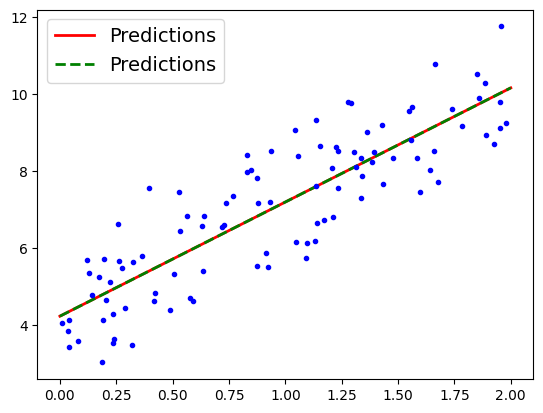

In [16]:
plt.plot(data_new, ols_output_list, "r-", linewidth=2, label="Predictions")
plt.plot(data_new, sk_output, "g-", linestyle='dashed', linewidth=2, label="Predictions")

plt.plot(data, output, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()

#### Topic 4:

Linear Regression using SGDRegressor

In [17]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(data, output)
y_pred = reg.predict(data_new)

y_pred

C:\Users\143ra\anaconda3\envs\Python_3_8_13\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 4.20181459, 10.10695131])

C:\Users\143ra\AppData\Local\Temp\ipykernel_19064\2939336372.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(data_new, sk_output, "g-", linestyle='dashed',  linewidth=2, label="Sklearn Predictions")


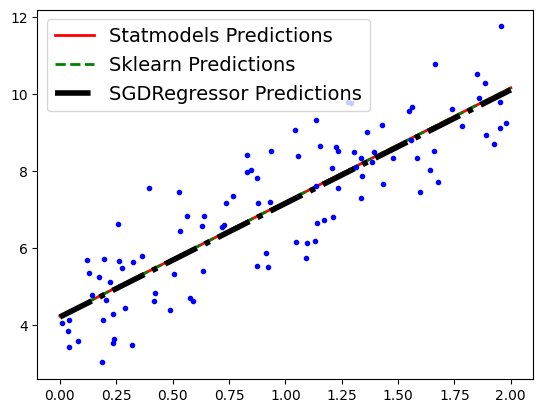

In [19]:
plt.plot(data_new, ols_output_list, "r-", linewidth=2, label="Statmodels Predictions")
plt.plot(data_new, sk_output, "g-", linestyle='dashed',  linewidth=2, label="Sklearn Predictions")
plt.plot(data_new, y_pred, "black", linestyle='dashdot',  linewidth=4, label="SGDRegressor Predictions")


plt.plot(data, output, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()